In [1]:
#------------------------------------------------------------------------------------
# Compute the correlation function of infected cases between counties
# Author: Pablo Villanueva Domingo
# Last update: 22/4/20
#------------------------------------------------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import time, datetime
from paircorrelation import *

only_land = 1

pop_tab = pd.read_csv("covid_usafacts.csv")
pop_tab.head()

# Loading metadata (coordinates, etc) for each county
loc_tab = pd.read_csv("covid_meta.csv")
loc_tab.head()

Lat       Long  Population       UID loc_type               location  \
0  32.318200 -86.902300   4688897.0  84000001   parent  Alabama (Unallocated)   
1  32.539527 -86.644082     55869.0  84001001    child         Autauga County   
2  30.727750 -87.722071    223234.0  84001003    child         Baldwin County   
3  31.868263 -85.387129     24686.0  84001005    child         Barbour County   
4  32.996421 -87.125115     22394.0  84001007    child            Bibb County   

      parent_loc  
0  United States  
1        Alabama  
2        Alabama  
3        Alabama  
4        Alabama

In [2]:
list_states = loc_tab[loc_tab.loc_type=="parent"].UID.values

def remove_states(df):
    size = df.shape[0]
    indexes = []
    for i in range(size):
        if (df.iloc[i]["UID"] in list_states):
            indexes.append(i)
    df = df.drop(indexes)
    return df

def merged_table(pop_tab,loc_tab,date):

    pop_frame = pop_tab[pop_tab.date==date].reset_index(drop=True)

    tab_tot = pop_frame.merge(loc_tab)
    tab_tot = remove_states(tab_tot)

    # Remove counties from Alaska and Hawaii (computations only in contiguous states)
    tab_tot = tab_tot[tab_tot["parent_loc"]!="Alaska"]
    tab_tot = tab_tot[tab_tot["parent_loc"]!="Hawaii"]

    # Remove some counties without coordinates (Grand Princess Cruise Ship, New York City Unallocated, Wade Hampton Census Area...)
    tab_tot = tab_tot[np.isnan(tab_tot["Lat"])==False]
    tab_tot = tab_tot[np.isnan(tab_tot["Long"])==False]

    return tab_tot

In [3]:
"""fig, axs = plt.subplots(figsize=(10,6))

date = "2020-03-14"
tab_tot = merged_table(pop_tab,loc_tab,date)

lat_min, lat_max = tab_tot.Lat.min(), tab_tot.Lat.max()
lon_min, lon_max = tab_tot.Long.min(), tab_tot.Long.max()
if only_land:
    lat_min, lat_max = 30., 40.
    lon_min, lon_max = -110., -80.#-100., -80.
lat_length = lat_max - lat_min
lon_length = lon_max - lon_min

domain_size = lat_length
dr = 0.05
rMax = domain_size / 4.
boundaries = [lon_min, lon_max, lat_min, lat_max]

print(lat_min, lat_max, lon_min, lon_max, rMax)

lonvec, latvec = tab_tot.Long.values, tab_tot.Lat.values

g_r, r, reference_indices = PairCorrelationFunction(lonvec, latvec, boundaries, rMax, dr)

axs.plot(r,g_r,color="r",linestyle="-")
#axs.set_xscale('log')
axs.set_ylabel("Correlation function")
axs.set_xlabel("r")
plt.savefig("correlation_function_counties.pdf")"""

'fig, axs = plt.subplots(figsize=(10,6))\n\ndate = "2020-03-14"\ntab_tot = merged_table(pop_tab,loc_tab,date)\n\nlat_min, lat_max = tab_tot.Lat.min(), tab_tot.Lat.max()\nlon_min, lon_max = tab_tot.Long.min(), tab_tot.Long.max()\nif only_land:\n    lat_min, lat_max = 30., 40.\n    lon_min, lon_max = -110., -80.#-100., -80.\nlat_length = lat_max - lat_min\nlon_length = lon_max - lon_min\n\ndomain_size = lat_length\ndr = 0.05\nrMax = domain_size / 4.\nboundaries = [lon_min, lon_max, lat_min, lat_max]\n\nprint(lat_min, lat_max, lon_min, lon_max, rMax)\n\nlonvec, latvec = tab_tot.Long.values, tab_tot.Lat.values\n\ng_r, r, reference_indices = PairCorrelationFunction(lonvec, latvec, boundaries, rMax, dr)\n\naxs.plot(r,g_r,color="r",linestyle="-")\n#axs.set_xscale(\'log\')\naxs.set_ylabel("Correlation function")\naxs.set_xlabel("r")\nplt.savefig("correlation_function_counties.pdf")'

30.0 40.0 -110.0 -80.0 2.5


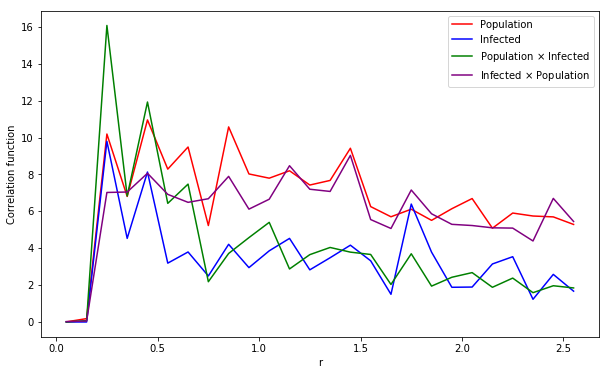

In [4]:
fig, axs = plt.subplots(figsize=(10,6))

date = "2020-03-14"
tab_tot = merged_table(pop_tab,loc_tab,date)

lat_min, lat_max = tab_tot.Lat.min(), tab_tot.Lat.max()
lon_min, lon_max = tab_tot.Long.min(), tab_tot.Long.max()
if only_land:
    lat_min, lat_max = 30., 40.
    lon_min, lon_max = -110., -80.#-100., -80.
lat_length = lat_max - lat_min
lon_length = lon_max - lon_min

domain_size = lat_length
dr = 0.1
rMax = domain_size / 4.
boundaries = [lon_min, lon_max, lat_min, lat_max]

print(lat_min, lat_max, lon_min, lon_max, rMax)

lonvec, latvec = tab_tot.Long.values, tab_tot.Lat.values
pop, inf = tab_tot.Population.values, tab_tot.Confirmed.values

g_pop, r, reference_indices = PopulationCorrelationFunction(lonvec, latvec, pop, pop, boundaries, rMax, dr)
g_inf, r, reference_indices = PopulationCorrelationFunction(lonvec, latvec, inf, inf, boundaries, rMax, dr)
g_popinf, r, reference_indices = PopulationCorrelationFunction(lonvec, latvec, pop, inf, boundaries, rMax, dr)
g_infpop, r, reference_indices = PopulationCorrelationFunction(lonvec, latvec, inf, pop, boundaries, rMax, dr)



axs.plot(r,g_pop,color="r",linestyle="-",label="Population")
axs.plot(r,g_inf,color="b",linestyle="-",label="Infected")
axs.plot(r,g_popinf,color="g",linestyle="-",label=r"Population $\times$ Infected")
axs.plot(r,g_infpop,color="purple",linestyle="-",label=r"Infected $\times$ Population")
#axs.plot(r,g_inf/g_pop,color="cyan",linestyle="-",label="Infected/Population")


axs.set_ylabel("Correlation function")
axs.set_xlabel("r")
axs.legend()
plt.savefig("correlation_function.pdf")

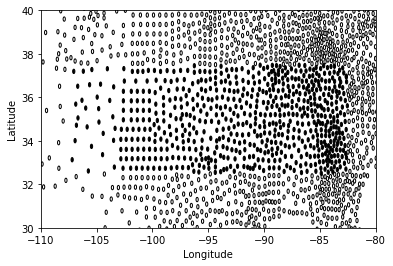

In [5]:
plot_adsorbed_circles(lonvec, latvec, 0.1, boundaries, reference_indices=reference_indices)

In [6]:
plt.scatter(lonvec, latvec,s=0.00001*tab_tot.Population.values)
#plt.xlim(-110., -81.)
#plt.ylim(31., 41.)